# **1. Exploración y Preparación de los Datos**

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Cargar los datos
file_path = 'teleCust1000t.csv'  # Ruta al archivo
df = pd.read_csv(file_path)

In [55]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [56]:
# Explorar el dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000 

In [57]:
print(df.columns)
df['custcat'].value_counts()

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


,count
custcat,
3,281
1,266
4,236
2,217


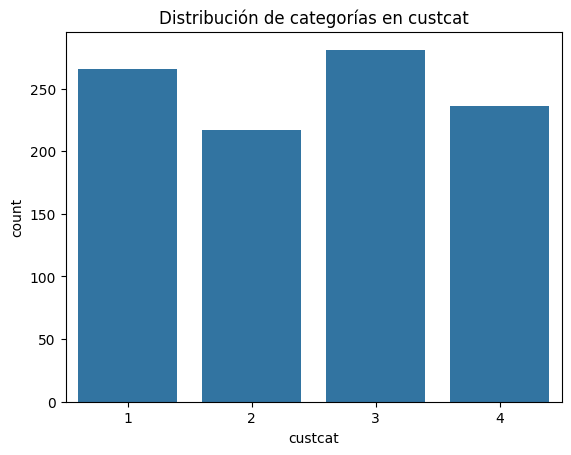

In [58]:
# Visualizar la distribución de 'custcat'
sns.countplot(x='custcat', data=df)
plt.title('Distribución de categorías en custcat')
plt.show()

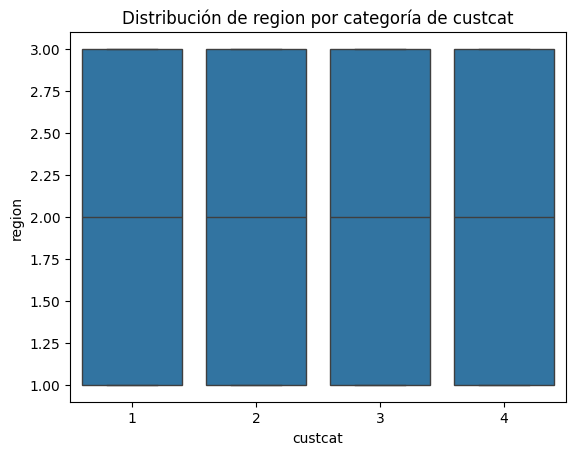

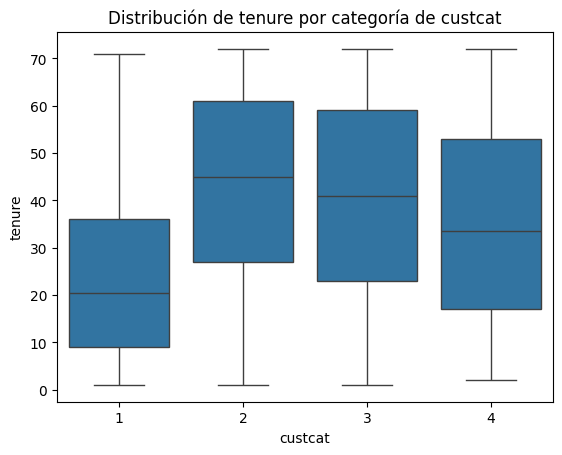

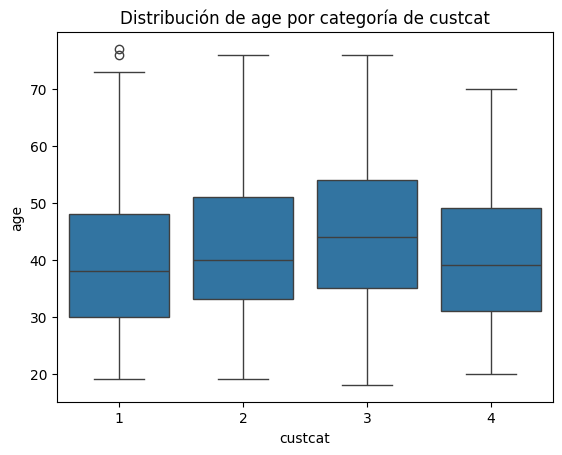

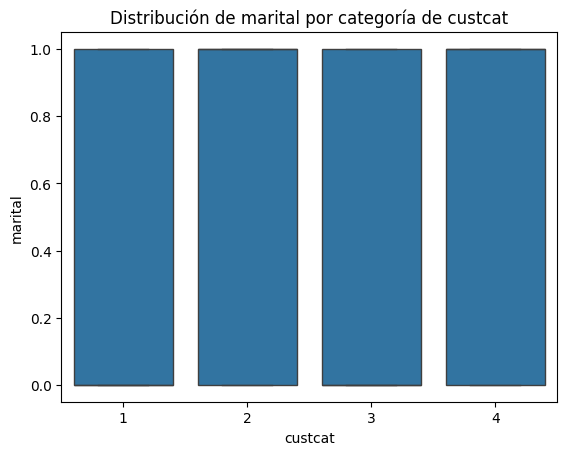

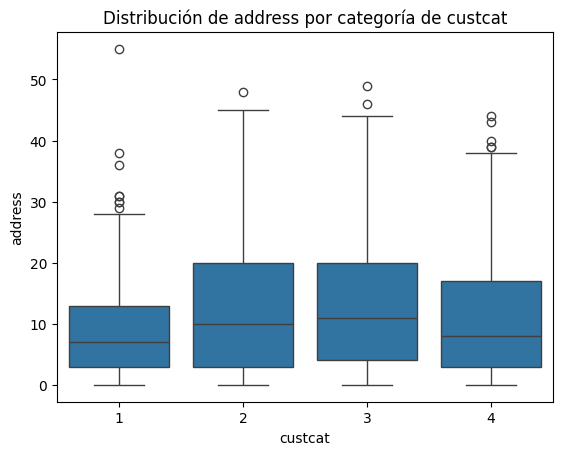

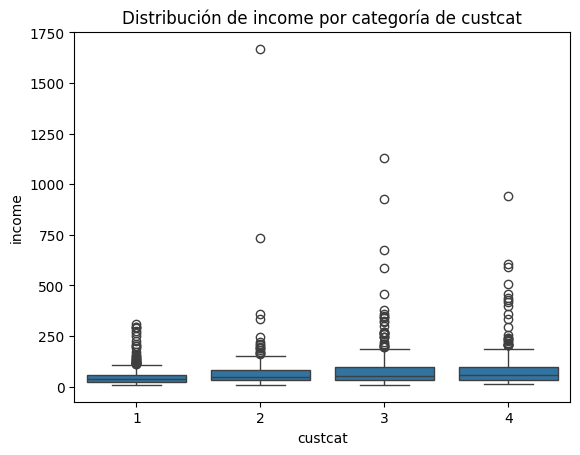

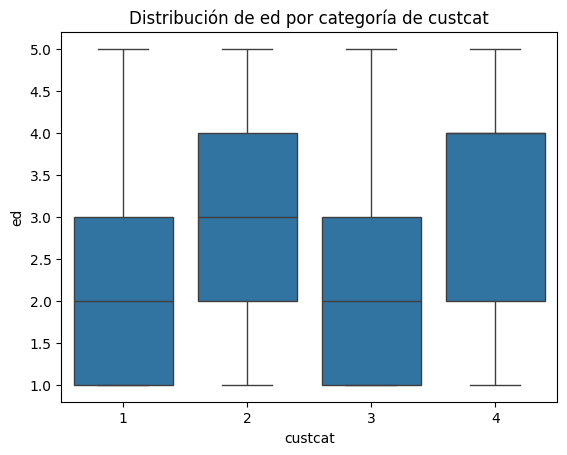

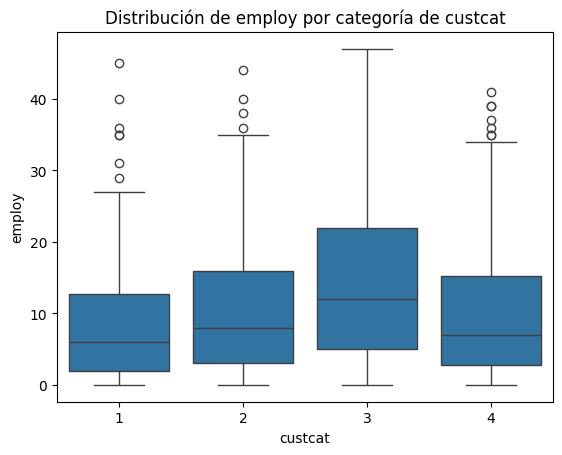

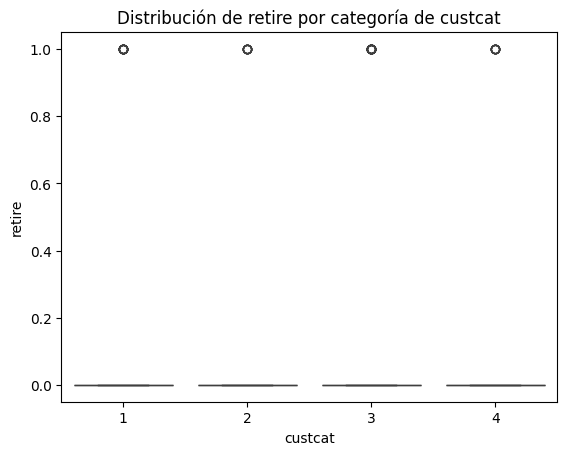

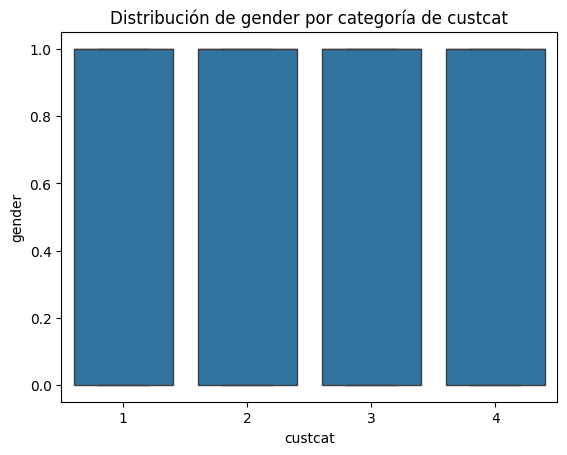

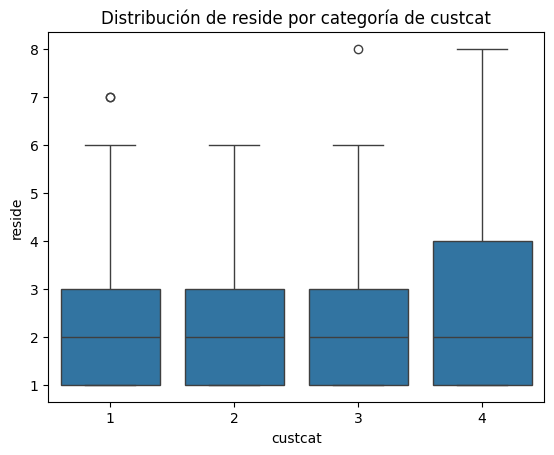

In [59]:
# Analizar las características con respecto a 'cuscat'
for col in df.columns:
    if col != 'custcat':
        sns.boxplot(x='custcat', y=col, data=df)
        plt.title(f'Distribución de {col} por categoría de custcat')
        plt.show()

    Feature  Importance
1    tenure    0.175937
5    income    0.159056
2       age    0.137224
4   address    0.129594
7    employ    0.126197
6        ed    0.093334
10   reside    0.065554
0    region    0.053631
9    gender    0.031394
3   marital    0.022845
8    retire    0.005234


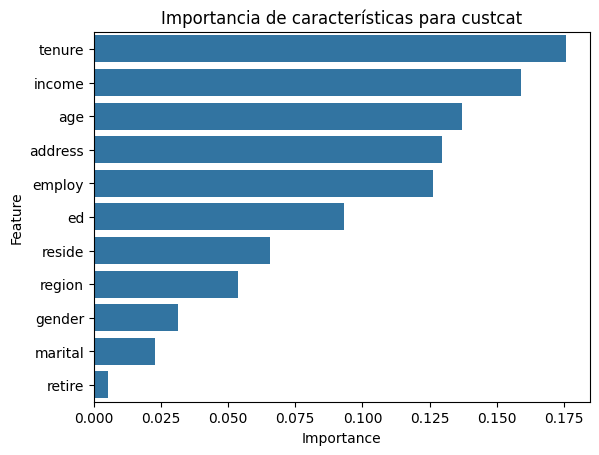

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Separar variables independientes y objetivo
X = df.drop(columns='custcat')
y = df['custcat']

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar un modelo simple de Random Forest para evaluar importancia de variables
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtener importancia de características
importances = model.feature_importances_
feature_names = df.drop(columns='custcat').columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualizar importancia
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de características para custcat')
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Entrenar un árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Exportar las reglas
tree_rules = export_text(tree_model, feature_names=list(feature_names))
print(tree_rules)


|--- ed <= -0.14
|   |--- tenure <= 0.05
|   |   |--- income <= -0.41
|   |   |   |--- class: 1
|   |   |--- income >  -0.41
|   |   |   |--- class: 3
|   |--- tenure >  0.05
|   |   |--- ed <= -0.96
|   |   |   |--- class: 3
|   |   |--- ed >  -0.96
|   |   |   |--- class: 3
|--- ed >  -0.14
|   |--- tenure <= -0.61
|   |   |--- reside <= 1.51
|   |   |   |--- class: 1
|   |   |--- reside >  1.51
|   |   |   |--- class: 4
|   |--- tenure >  -0.61
|   |   |--- income <= -0.28
|   |   |   |--- class: 2
|   |   |--- income >  -0.28
|   |   |   |--- class: 4



In [62]:
# Calcular correlaciones con la variable objetivo
correlation = df.corr()
print(correlation['custcat'].sort_values(ascending=False))


custcat    1.000000
ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
retire     0.008908
gender    -0.004966
region    -0.023771
Name: custcat, dtype: float64


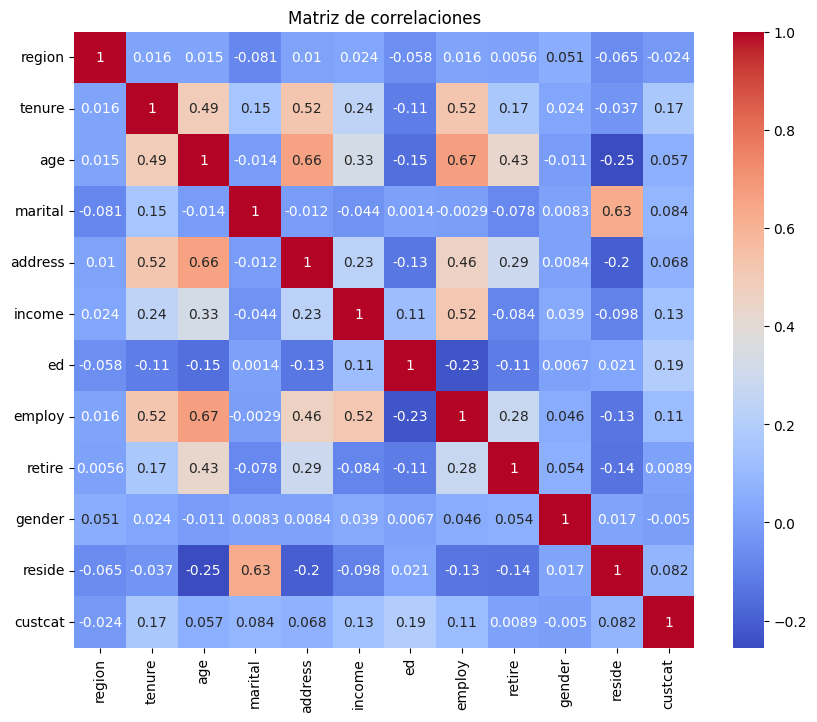

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlaciones')
plt.show()

# **(SHapley Additive exPlanations)**

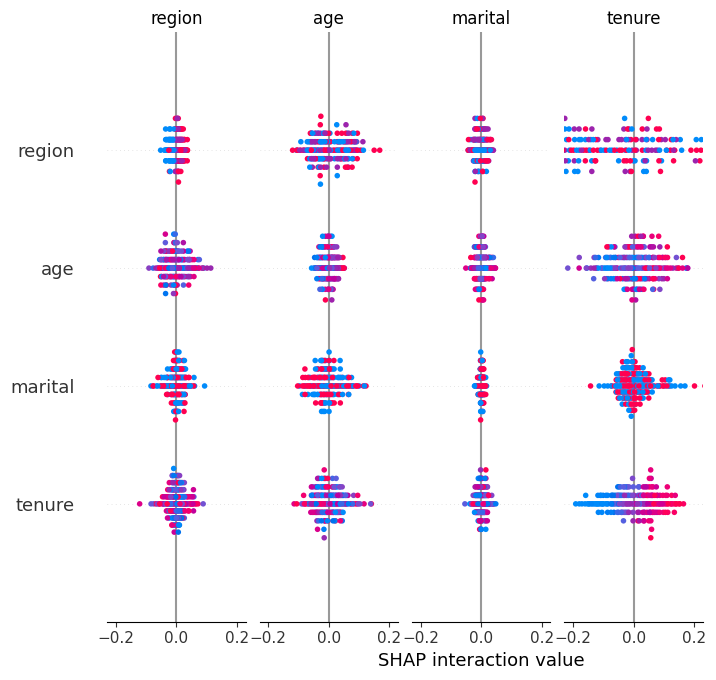

In [64]:
import shap

# Crear el explicador SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizar valores SHAP
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


Este gráfico sugiere que:

**tenure **tiene una interacción más importante con otras características, lo que la hace relevante para el modelo.
**region** tiene una interacción menos significativa, lo que refuerza que podría ser una candidata para ser eliminada.
Las interacciones complejas entre características (**como age y marital**) podrían estar capturando patrones no lineales en los datos.

Basando en los gràficos anteriores se puede determinar que las caracteristicas con mayor peso para **entrenar el modelo son: ed, tenure, income, employ, reside
marital,age** y aquellas que se pueden **quitar** y no representan un aporte significativo son **retire, gender, region, employ**. Respecto a la variable  address se entrenarà el modelo con ella y quitandola para validar que score puede obtener al predecir la variable multiclase 'custcat'.


# **2.Preprocesamiento**

In [65]:
#eliminar variables con poca relaciòn con custcat: retire, gender, region, employ
df = df.drop(columns=['retire', 'gender', 'region', 'employ'])


In [66]:
df.head()

,tenure,age,marital,address,income,ed,reside,custcat
0,13,44,1,9,64.0,4,2,1
1,11,33,1,7,136.0,5,6,4
2,68,52,1,24,116.0,1,2,3
3,33,33,0,12,33.0,2,1,1
4,23,30,1,9,30.0,1,4,3


In [67]:
df.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'reside',
       'custcat'],
      dtype='object')

In [68]:
df.dtypes

,0
tenure,int64
age,int64
marital,int64
address,int64
income,float64
ed,int64
reside,int64
custcat,int64


In [69]:
# Calcular percentiles y IQR para cada columna numérica
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

iqr_stats = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # 25° percentil
    Q3 = df[col].quantile(0.75)  # 75° percentil
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Guardar estadísticas en un diccionario
    iqr_stats[col] = {
        'Q1 (25%)': Q1,
        'Q3 (75%)': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Below': sum(df[col] < lower_bound),
        'Outliers Above': sum(df[col] > upper_bound)
    }

# Convertir a DataFrame para visualización
iqr_df = pd.DataFrame(iqr_stats).T
print(iqr_df)

         Q1 (25%)  Q3 (75%)   IQR  Lower Bound  Upper Bound  Outliers Below  \
tenure       17.0      54.0  37.0        -38.5        109.5             0.0   
age          32.0      51.0  19.0          3.5         79.5             0.0   
marital       0.0       1.0   1.0         -1.5          2.5             0.0   
address       3.0      18.0  15.0        -19.5         40.5             0.0   
income       29.0      83.0  54.0        -52.0        164.0             0.0   
ed            2.0       4.0   2.0         -1.0          7.0             0.0   
reside        1.0       3.0   2.0         -2.0          6.0             0.0   
custcat       1.0       3.0   2.0         -2.0          6.0             0.0   

         Outliers Above  
tenure              0.0  
age                 0.0  
marital             0.0  
address            13.0  
income             93.0  
ed                  0.0  
reside              6.0  
custcat             0.0  


# **Estandarizaciòn de los datos a partir del IQR**

In [70]:
#pasar datos flotantes a enteros
df['income'] = df['income'].astype(int)
df.dtypes

,0
tenure,int64
age,int64
marital,int64
address,int64
income,int64
ed,int64
reside,int64
custcat,int64


In [71]:
from sklearn.preprocessing import RobustScaler

# Crear el scaler robusto
robust_scaler = RobustScaler()

# Seleccionar las columnas numéricas
numeric_columns = ['reside', 'income', 'address', 'age']

# Escalar las variables utilizando RobustScaler
df[numeric_columns] = robust_scaler.fit_transform(df[numeric_columns])

print(df[numeric_columns].head())

   reside    income   address       age
0     0.0  0.314815  0.000000  0.210526
1     2.0  1.648148 -0.133333 -0.368421
2     0.0  1.277778  1.000000  0.631579
3    -0.5 -0.259259  0.200000 -0.368421
4     1.0 -0.314815  0.000000 -0.526316


In [73]:
from sklearn.preprocessing import StandardScaler

# Crear el scaler estándar
scaler = StandardScaler()

# Seleccionar las columnas numéricas
numeric_columns = ['tenure', 'ed', 'marital']

# Escalar las variables utilizando StandardScaler
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [74]:
df.head()

,tenure,age,marital,address,income,ed,reside,custcat
0,-1.055125,0.210526,1.010051,0.000000,0.314815,1.087753,0.0,1
1,-1.148806,-0.368421,1.010051,-0.133333,1.648148,1.906227,2.0,4
2,1.521092,0.631579,1.010051,1.000000,1.277778,-1.367671,0.0,3
3,-0.118319,-0.368421,-0.990050,0.200000,-0.259259,-0.549196,-0.5,1
4,-0.586722,-0.526316,1.010051,0.000000,-0.314815,-1.367671,1.0,3


In [76]:
# Guardar el DataFrame resultante en un archivo CSV
df.to_csv('datos_estandarizados_2.csv', index=False)

# Confirmación
print("CSV guardado correctamente")

CSV guardado correctamente
